In [41]:
!pip install altair vega_datasets

     |████████████████████████████████| 210 kB 1.7 MB/s eta 0:00:01


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
from nltk.probability import FreqDist
from nltk import tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


In [2]:
import networkx as nx
import codecs
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from nltk import sent_tokenize
from textblob import TextBlob


In [3]:
df = pd.read_csv('./data/lotr_scripts.csv')
df.head()

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol!,The Return of the King
4,4,SMEAGOL,Deagol!,The Return of the King


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:

df.columns

Index(['char', 'dialog', 'movie'], dtype='object')

In [6]:
df.movie.unique()

array(['The Return of the King ', 'The Two Towers ',
       'The Fellowship of the Ring '], dtype=object)

In [7]:
df.char.unique()

array(['DEAGOL', 'SMEAGOL', '(GOLLUM', 'FRODO', 'MERRY', 'GIMLI',
       'GOLLUM', 'SAM', 'GANDALF', 'ARAGORN', 'PIPPIN', 'HOBBIT', 'ROSIE',
       'BILBO', 'TREEBEARD', 'SARUMAN', 'THEODEN', 'GALADRIL', 'ELROND',
       'GRIMA', 'FRODO VOICE OVER', 'WITCH KING', 'EOWYN', 'FARAMIR',
       'ORC', '\xa0GANDALF', 'SOLDIERS ON GATE', 'GOTHMOG', 'GENERAL',
       'CAPTAIN', 'SOLDIER', 'MOUTH OF SAURON', 'EOMER', 'ARMY', 'BOSON',
       'MERCENARY', 'EOWYN/MERRY', 'DENETHOR', 'ROHIRRIM',
       'GALADRIEL VOICEOVER', 'LEGOLAS', 'GALADRIEL', 'KING OF THE DEAD',
       'GRIMBOLD', 'IROLAS', 'ORCS', 'GAMLING', 'MADRIL', 'DAMROD',
       'SOLDIERS', 'SOLDIERS IN MINAS TIRITH', 'GANDALF VOICEOVER',
       'SOLDIER 1', 'SOLDIER 2', 'WOMAN', 'HALDIR', 'SAM VOICEOVER',
       'OLD MAN', 'BOROMIR', 'CROWD', 'ARWEN', 'ELROND VOICEOVER',
       'ARWEN VOICEOVER', 'ARAGORN ', 'HAMA', 'SHARKU', 'PEOPLE', 'LADY',
       'FREDA', 'MORWEN', 'EYE OF SAURON', 'ROHAN STABLEMAN', 'GORBAG',
       'ARGORN', 'GA

In [8]:
df['char'].replace(['GAN DALF','\xa0GANDALF','FRODO VOICE','(GOLLUM','FRODO VOICE OVER','ARWEN VOICEOVER','ELROND VOICEOVER',
                   'GALADRIL','GALADRIEL VOICEOVER','GALADRIEL VOICE-OVER','SMEAGOL','ARGORN','GALADRIEL VOICE OVER','SARUMAN VOICE OVER ','ARGORN ','SARUMAN VOICEOVER','GANDALF VOICE OVER','SAM ','GATEKEEPR','BILBO VOICEOVER','SAM VOICEOVER','ELROND VOICEOVER','GANDALF VOICEOVER','SARUMAN VOICE OVER','SAURON VOICE', 'FRODO ','ARAGORN ','BOROMIR '],
                  ['GANDALF','GANDALF','FRODO','GOLLUM','FRODO','ARWEN','ELROND','GALADRIEL','GALADRIEL','GALADRIEL','GOLLUM','ARAGORN','GALADRIEL','SARUMAN','ARGORN','SARUMAN','GANDALF','SAM','GATEKEEPER','BILBO','SAM','ELROND','GANDALF','SARUMAN','SAURON','FRODO','ARAGORN','BOROMIR'],inplace=True)

df.char.unique()

array(['DEAGOL', 'GOLLUM', 'FRODO', 'MERRY', 'GIMLI', 'SAM', 'GANDALF',
       'ARAGORN', 'PIPPIN', 'HOBBIT', 'ROSIE', 'BILBO', 'TREEBEARD',
       'SARUMAN', 'THEODEN', 'GALADRIEL', 'ELROND', 'GRIMA', 'WITCH KING',
       'EOWYN', 'FARAMIR', 'ORC', 'SOLDIERS ON GATE', 'GOTHMOG',
       'GENERAL', 'CAPTAIN', 'SOLDIER', 'MOUTH OF SAURON', 'EOMER',
       'ARMY', 'BOSON', 'MERCENARY', 'EOWYN/MERRY', 'DENETHOR',
       'ROHIRRIM', 'LEGOLAS', 'KING OF THE DEAD', 'GRIMBOLD', 'IROLAS',
       'ORCS', 'GAMLING', 'MADRIL', 'DAMROD', 'SOLDIERS',
       'SOLDIERS IN MINAS TIRITH', 'SOLDIER 1', 'SOLDIER 2', 'WOMAN',
       'HALDIR', 'OLD MAN', 'BOROMIR', 'CROWD', 'ARWEN', 'HAMA', 'SHARKU',
       'PEOPLE', 'LADY', 'FREDA', 'MORWEN', 'EYE OF SAURON',
       'ROHAN STABLEMAN', 'GORBAG', 'UGLUK', 'SHAGRAT', 'URUK-HAI',
       'SNAGA', 'GRISHNAKH', 'MERRY and PIPPIN', 'WILDMAN', 'STRIDER',
       'EOTHAIN', 'ROHAN HORSEMAN', 'SAURON', 'FARMER MAGGOT',
       'WHITE WIZARD', 'MERRY AND PIPPIN', 'GAFFE

In [9]:
qtd_dialogo = df.groupby(by='char')['dialog'].count()
qtd_dialogo = pd.DataFrame({'personagem':qtd_dialogo.index, 'qtd_dialog':qtd_dialogo.values})
qtd_dialogo.sort_values(by='qtd_dialog',inplace=True,ascending=False)

In [10]:
qtd_dialogo.personagem.unique()

array(['FRODO', 'SAM', 'GANDALF', 'ARAGORN', 'GOLLUM', 'PIPPIN', 'MERRY',
       'GIMLI', 'THEODEN', 'FARAMIR', 'EOWYN', 'LEGOLAS', 'BILBO',
       'TREEBEARD', 'DENETHOR', 'SARUMAN', 'BOROMIR', 'ARWEN', 'EOMER',
       'SOLDIER', 'ELROND', 'GRIMA', 'STRIDER', 'ORC', 'GALADRIEL',
       'GAMLING', 'GOTHMOG', 'UGLUK', 'SHAGRAT', 'KING OF THE DEAD',
       'WITCH KING', 'HALDIR', 'MADRIL', 'HAMA', 'URUK HAI',
       'MOUTH OF SAURON', 'MORWEN', 'BARLIMAN', 'GRISHNAKH', 'GORBAG',
       'MERRY and PIPPIN', 'WILDMAN', 'CHILDREN HOBBITS', 'CROWD',
       'DEAGOL', 'SAURON', 'ORCS', 'WOMAN', 'GATEKEEPER', 'IROLAS',
       'GAFFER', 'FREDA', 'HOBBIT', 'PEOPLE', 'SNAGA', 'SANDYMAN',
       'ROSIE', 'ROHIRRIM', 'ROHAN HORSEMAN', 'CAPTAIN', 'DAMROD',
       'VOICE', 'ARMY', 'MERRY AND PIPPIN', 'GENERAL', 'BOSON',
       'SOLDIER 1', 'GRISHNAK', 'URUK-HAI', 'SOLDIERS ON GATE',
       'WHITE WIZARD', 'SOLDIERS IN MINAS TIRITH', 'SOLDIERS', 'GRIMBOLD',
       'SOLDIER 2', 'MEN', 'EOTHAIN', 'SHARKU'

In [11]:
alt.Chart(qtd_dialogo).mark_bar().encode(
    x='qtd_dialog',
    y=alt.Y('personagem', sort='-x')
)

alt.Chart(...)

In [12]:
alt.Chart(qtd_dialogo).mark_bar().encode(
    x=alt.X('personagem', sort='-y'),
    y='qtd_dialog'
)

alt.Chart(...)

In [13]:
qtd_dialogo_movie = df.groupby(by=['movie','char'])['dialog'].count()
qtd_dialogo_movie

movie                        char        
The Fellowship of the Ring   ARAGORN         27
                             ARWEN           15
                             BARLIMAN         4
                             BILBO           43
                             BOROMIR         25
                                             ..
The Two Towers               URUK HAI         5
                             URUK-HAI         1
                             WHITE WIZARD     1
                             WILDMAN          3
                             WOMAN            3
Name: dialog, Length: 139, dtype: int64

In [14]:
teste = qtd_dialogo_movie.unstack().T
teste

movie,The Fellowship of the Ring,The Return of the King,The Two Towers
char,,,
ARAGORN,27.0,61.0,101.0
ARMY,NaN,2.0,NaN
ARWEN,15.0,9.0,16.0
BARLIMAN,4.0,NaN,NaN
BILBO,43.0,5.0,NaN
...,...,...,...
VOICE,2.0,NaN,NaN
WHITE WIZARD,NaN,NaN,1.0
WILDMAN,NaN,NaN,3.0


In [15]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('char:N', sort='-y'),
    y='count(char):Q',
    color='movie:N',
    column='movie:N'
)

alt.Chart(...)

In [16]:
from string import punctuation
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [17]:
text = list()
def token(dialog):
    token = word_tokenize(dialog)
    tokens = []
    for i in token: 
        if i.lower() not in stop_words and i not in punctuation:
            tokens.append(i.lower())
    text.append(' '.join(tokens))
#     return tokens

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   char    2390 non-null   object
 1   dialog  2389 non-null   object
 2   movie   2390 non-null   object
dtypes: object(3)
memory usage: 56.1+ KB


In [18]:
df.dropna(inplace=True)

In [19]:
df.loc[~df["dialog"].isnull()]["dialog"].map(token)     

0       None
1       None
2       None
3       None
4       None
        ... 
2385    None
2386    None
2387    None
2388    None
2389    None
Name: dialog, Length: 2389, dtype: object

In [20]:
df[:8]

,char,dialog,movie
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,GOLLUM,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,DEAGOL,Arrghh!,The Return of the King
3,GOLLUM,Deagol!,The Return of the King
4,GOLLUM,Deagol!,The Return of the King
5,GOLLUM,Deagol!,The Return of the King
6,GOLLUM,Give us that! Deagol my love,The Return of the King
7,DEAGOL,Why?,The Return of the King


In [21]:
df['tratamento_1']=text

     Palavra  Frequencia
5                     82
16     frodo          18
115   pippin          13
14   gandalf          12
215    merry          12
519      yes          11
27       sam           8
28   aragorn           8


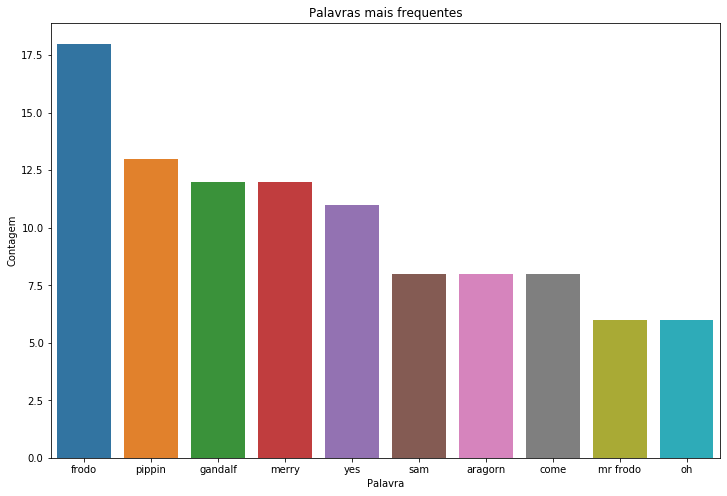

In [22]:
def pareto(texto, coluna, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna]]) #lista contendo todas as frases

# #     todas_palavras = ' '.join([text for text in texto[texto[coluna_fake]== fake]][coluna]) #lista contendo todas as frases
    token_espaco = tokenize.WhitespaceTokenizer()
    token = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(texto[coluna])
    if frequencia.keys() != None:
        df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())})
        df_frequencia = df_frequencia.nlargest(columns= "Frequencia", n=quantidade)
        print(df_frequencia[:8])
        plt.figure(figsize=(12,8))
        ax = sns.barplot(data = df_frequencia[1:], x = "Palavra", y = "Frequencia")
        ax.set(ylabel="Contagem")
        plt.title('Palavras mais frequentes')
        plt.show()
    
pareto(df,'tratamento_1', 11)


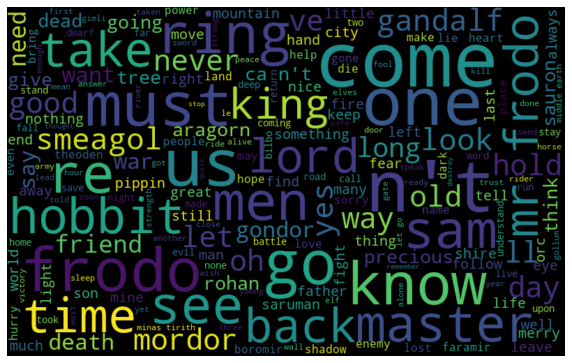

In [23]:
def wordcloud(texto, coluna_texto):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]]) #lista contendo todas as frases

    word_cloud = WordCloud(width=800, height=500,max_font_size=110).generate(todas_palavras)
    plt.figure(figsize=[10,10])
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
wordcloud(df,'tratamento_1')

In [26]:
vectorizer = TfidfVectorizer()

In [27]:
X = vectorizer.fit_transform(df.tratamento_1)

In [28]:
X.todense().sort()
X

<2389x3238 sparse matrix of type '<class 'numpy.float64'>'
	with 12026 stored elements in Compressed Sparse Row format>

In [29]:
feature_names = vectorizer.get_feature_names()

df_tf = pd.DataFrame(X.todense(), columns=feature_names)


In [30]:
df_tf.head()

,000,10,1296,1400,17,2000,22nd,300,42,43,...,yet,yetthat,yield,you,young,youon,your,youshould,youto,youwhen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [327]:
def ocurence(text,cast):
    #monta os pares de personagens
    possible_pairs = list(itertools.combinations(cast, 2))
    #monta um dicionario onde a chave são os pares e os valores é o total de ocorrencias
    cooccurring = dict.fromkeys(possible_pairs, 0)
    
    for title, chapter in df['dialog'].items():
        for sent in sent_tokenize(chapter):
            for pair in possible_pairs:
                if pair[0].lower() in sent.lower() and pair[1].lower() in sent.lower():
                    cooccurring[pair] += 1              
    return cooccurring                
#ocurence(df,df.char)

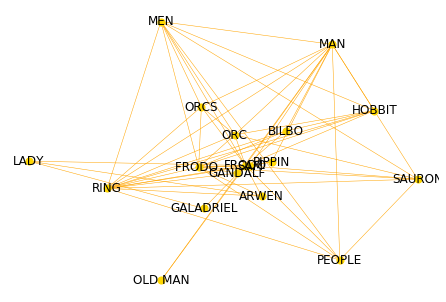

In [328]:
    G = nx.Graph()
    G.name = "The Social Network of Lord of Rings"
    cast = df['char']

    pairs = ocurence(df, cast)
    for pair, wgt in pairs.items():
        if wgt>0:
            G.add_edge(pair[0], pair[1], weight=wgt)

    # Make Frodo the center
    D = nx.ego_graph(G, "FRODO")
    edges, weights = zip(*nx.get_edge_attributes(D, "weight").items())

    # Push nodes away that are less related to Frodo
    pos = nx.spring_layout(D, k=.5, iterations=40)
    nx.draw(D, pos, node_color="gold", node_size=50, edgelist=edges,
            width=.5, edge_color="orange", with_labels=True, font_size=12)
    plt.show()

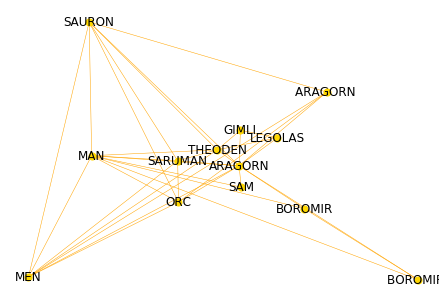

In [333]:
G = nx.Graph()
G.name = "The Social Network of Lord of Rings"
#     cast = df['char']

#     pairs = ocurence(df, cast)
for pair, wgt in pairs.items():
    if wgt>0:
        G.add_edge(pair[0], pair[1], weight=wgt)


    # Make Frodo the center
D = nx.ego_graph(G, "ARAGORN")
edges, weights = zip(*nx.get_edge_attributes(D, "weight").items())

    # Push nodes away that are less related to Frodo
pos = nx.spring_layout(D, k=.5, iterations=40)
nx.draw(D, pos, node_color="gold", node_size=50, edgelist=edges,
            width=.5, edge_color="orange", with_labels=True, font_size=12)
plt.show()

In [335]:
print(nx.info(G))


Name: The Social Network of Lord of Rings
Type: Graph
Number of nodes: 57
Number of edges: 191
Average degree:   6.7018


In [268]:
personagem_ativos = qtd_dialogo[:10]
personagem_ativos

,personagem,qtd_dialog
25,FRODO,228
71,SAM,218
30,GANDALF,215
0,ARAGORN,187
35,GOLLUM,183
64,PIPPIN,163
53,MERRY,137
34,GIMLI,115
85,THEODEN,110
21,FARAMIR,65


In [336]:
pairs

{('DEAGOL', 'GOLLUM'): 0,
 ('DEAGOL', 'DEAGOL'): 12,
 ('DEAGOL', 'FRODO'): 0,
 ('DEAGOL', 'MERRY'): 0,
 ('DEAGOL', 'GIMLI'): 0,
 ('DEAGOL', 'SAM'): 0,
 ('DEAGOL', 'GANDALF'): 0,
 ('DEAGOL', 'ARAGORN'): 0,
 ('DEAGOL', 'PIPPIN'): 0,
 ('DEAGOL', 'HOBBIT'): 0,
 ('DEAGOL', 'ROSIE'): 0,
 ('DEAGOL', 'BILBO'): 0,
 ('DEAGOL', 'TREEBEARD'): 0,
 ('DEAGOL', 'SARUMAN'): 0,
 ('DEAGOL', 'THEODEN'): 0,
 ('DEAGOL', 'GALADRIEL'): 0,
 ('DEAGOL', 'ELROND'): 0,
 ('DEAGOL', 'GRIMA'): 0,
 ('DEAGOL', 'WITCH KING'): 0,
 ('DEAGOL', 'EOWYN'): 0,
 ('DEAGOL', 'FARAMIR'): 0,
 ('DEAGOL', 'ORC'): 0,
 ('DEAGOL', 'SOLDIERS ON GATE'): 0,
 ('DEAGOL', 'GOTHMOG'): 0,
 ('DEAGOL', 'GENERAL'): 0,
 ('DEAGOL', 'CAPTAIN'): 0,
 ('DEAGOL', 'SOLDIER'): 0,
 ('DEAGOL', 'MOUTH OF SAURON'): 0,
 ('DEAGOL', 'EOMER'): 0,
 ('DEAGOL', 'ARMY'): 0,
 ('DEAGOL', 'BOSON'): 0,
 ('DEAGOL', 'MERCENARY'): 0,
 ('DEAGOL', 'EOWYN/MERRY'): 0,
 ('DEAGOL', 'DENETHOR'): 0,
 ('DEAGOL', 'ROHIRRIM'): 0,
 ('DEAGOL', 'LEGOLAS'): 0,
 ('DEAGOL', 'KING OF THE DEAD

## Analise de sentimentos

In [24]:
df.head()

,char,dialog,movie,tratamento_1
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King,oh smeagol ive got one ive got fish smeagol sm...
1,GOLLUM,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King,pull go go go pull
2,DEAGOL,Arrghh!,The Return of the King,arrghh
3,GOLLUM,Deagol!,The Return of the King,deagol
4,GOLLUM,Deagol!,The Return of the King,deagol


In [25]:
blobs = [TextBlob(i) for i in df['tratamento_1']]
polarity = [blob.polarity for blob in blobs]

subjectivity = [blob.subjectivity for blob in blobs]

sentiment_analysed = pd.DataFrame({'headline_text':df['dialog'],
                                   'char':df['char'],
                                   'polarity':polarity, 
                                   'subjectivity':subjectivity},
                                  index=df.index)

In [46]:
personagens_falam_bastante.to_frame()

,personagem
23,FRODO
68,SAM
27,GANDALF
0,ARAGORN
32,GOLLUM
...,...
10,DAMROD
87,VOICE
1,ARMY
51,MERRY AND PIPPIN


In [47]:
# Remover personagens que só falam uma vez
personagens_falam_bastante = qtd_dialogo[qtd_dialogo['qtd_dialog'] > 1]['personagem']
personagens_falam_bastante = personagens_falam_bastante.to_frame()
sentiment_analysed = sentiment_analysed[sentiment_analysed['char']== personagens_falam_bastante['personagem']]
sentiment_analysed

ValueError: Can only compare identically-labeled Series objects

In [32]:
sentimento_medio_personagem = sentiment_analysed.groupby(by='char')['polarity'].mean()
sentimento_medio_personagem = sentimento_medio_personagem.to_frame()
sentimento_medio_personagem['personagem'] = sentimento_medio_personagem.index

In [35]:
sentimento_medio_personagem.sort_values(by='polarity')

,polarity,personagem
char,,
ROHAN STABLEMAN,-0.395833,ROHAN STABLEMAN
SHARKU,-0.187500,SHARKU
GENERAL,-0.150000,GENERAL
URUK HAI,-0.142857,URUK HAI
GOTHMOG,-0.114286,GOTHMOG
...,...,...
GRISHNAK,0.200000,GRISHNAK
ROSIE,0.350000,ROSIE
HOBBIT,0.416667,HOBBIT


In [33]:
alt.Chart(sentimento_medio_personagem).mark_bar().encode(
    x='polarity',
    y=alt.Y('personagem', sort='-x')
)

alt.Chart(...)